## TODO
rename file folders -- done 
check if differenet image count per class is problem -- 
load the dataset -- done
resize images via PIL Image load > convert to torch tensor or directly loading it via torchvision read image -- done
pridat vahovanie pre triedy ktorych je menej poctov - teda lepsia stratova funkcia
!!!  este pre vizualizaciu, confusion matrix - spravne je na diagonale

# Imports


In [1]:
import sys
import hashlib
!{sys.executable} -m pip install torch torchvision matplotlib numpy
from collections import Counter
import shutil

import torch
import numpy as np
#to load the dataset and to split the dataset
from torch.utils.data import DataLoader, random_split
#for resizing of images
from torchvision import transforms
#to read images from path
import random
from torchvision.io import read_image
from torchvision.datasets import ImageFolder
from PIL import Image
from pathlib import Path
import os
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Device: cuda


In [2]:
#simply getting working directory and appending the archive directories to it
base_dir = os.getcwd()
dataset_dir = os.path.join(base_dir, "archive/raw-img")
print("Dataset directory: ", dataset_dir)

Dataset directory:  c:\Users\adamg\Desktop\Ulohy\3 vyska\ZNEUS\cvika\zadania\zadanie 2\archive/raw-img


In [3]:
#size of the image that will be after "normalization" (setting all the images to the same size)
img_size = (224, 224)
#transormation that will be used on every image https://docs.pytorch.org/vision/stable/transforms.html
image_transform = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor()
    ])
analysis_transform = transforms.ToTensor()

#loading the dataset with pytorch using ImageFolder https://docs.pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html

image_dataset = ImageFolder(
    root = dataset_dir, 
    transform = image_transform 
)



#if you see ragno, my translate_names.py is not working correctly xd (its spider)
print("Dataset classes: ", image_dataset.classes)

#splitting the dataset to 70% train, 10% validation and 20% train using random_split   https://docs.pytorch.org/docs/stable/data.html#torch.utils.data.random_split

dataset_size = len(image_dataset)
print("Dataset Size:\t", dataset_size)
train_size = int(0.7 * dataset_size)
validation_size   = int(0.1 * dataset_size)
test_size  = dataset_size - train_size - validation_size

train_dataset, validation_dataset, test_dataset = random_split(image_dataset, [train_size, validation_size, test_size])
print("Split sizes:\nTrain:\t\t", len(train_dataset), "\nValidation:\t", len(validation_dataset), "\nTest:\t\t", len(test_dataset))


Dataset classes:  ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']
Dataset Size:	 26179
Split sizes:
Train:		 18325 
Validation:	 2617 
Test:		 5237


In [4]:
#loading the image_dataset to dataLoader https://docs.pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader
train_loader = DataLoader(
    dataset = train_dataset,
    shuffle = True, #this shuffles order of images each epoch, random_split randomizes it only once, maybe we dont need this
    batch_size = 10  #1 is default, maybe experiment with this later
)
validation_loader = DataLoader(
    dataset = validation_dataset,
    shuffle = True,
    batch_size = 10  
)
test_loader = DataLoader(
    dataset = test_dataset,
    shuffle = True,
    batch_size = 10  
)

#this is how we can iterate through the DataLoader
for image_tensor, labels in train_loader:
    #shape is [Batch_size, Channels, Height, Width]
    print(image_tensor.shape)
    #and label (correct class of the image) for each image in tensor (images)
    print(labels) 
    break

torch.Size([10, 3, 224, 224])
tensor([4, 4, 4, 8, 4, 8, 1, 4, 2, 8])


In [5]:
translate = {
    "cane": "dog",
    "cavallo": "horse",
    "elefante": "elephant",
    "farfalla": "butterfly",
    "gallina": "chicken",
    "gatto": "cat",
    "mucca": "cow",
    "pecora": "sheep",
    "scoiattolo": "squirrel",
    "ragno": "spider",
}


def rename_dirs(base_path: str):
    for fn in os.listdir(base_path):
        full = os.path.join(base_path, fn)

        if not os.path.isdir(full):
            continue
        if fn not in translate:
            continue

        new_name = translate[fn]
        print(f"{fn}  ->  {new_name}")
        os.rename(full, os.path.join(base_path, new_name))


def show_sample_images(dataset, num_images=10):
    indices = random.sample(range(len(dataset)), num_images)

    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(indices):
        img, label = dataset[idx] 
        if hasattr(img, "permute"):
            img = img.permute(1, 2, 0).numpy()

        plt.subplot(2, (num_images + 1) // 2, i + 1)
        plt.imshow(img)
        plt.title(dataset.classes[label])
        plt.axis("off")

    plt.tight_layout()
    plt.show()

Classes: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']
Classes Count: 10

Images per class:
butterfly: 2112
cat: 1668
chicken: 3098
cow: 1866
dog: 4863
elephant: 1446
horse: 2623
sheep: 1820
spider: 4821
squirrel: 1862


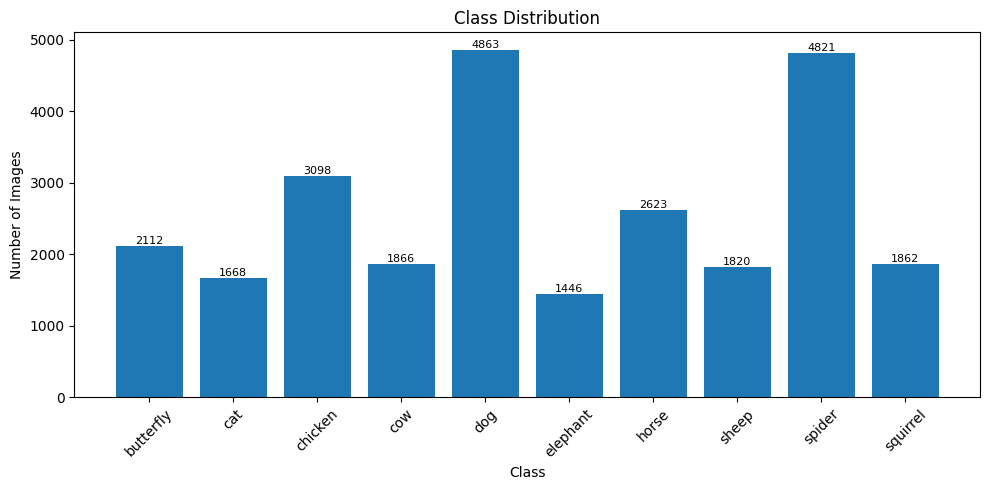

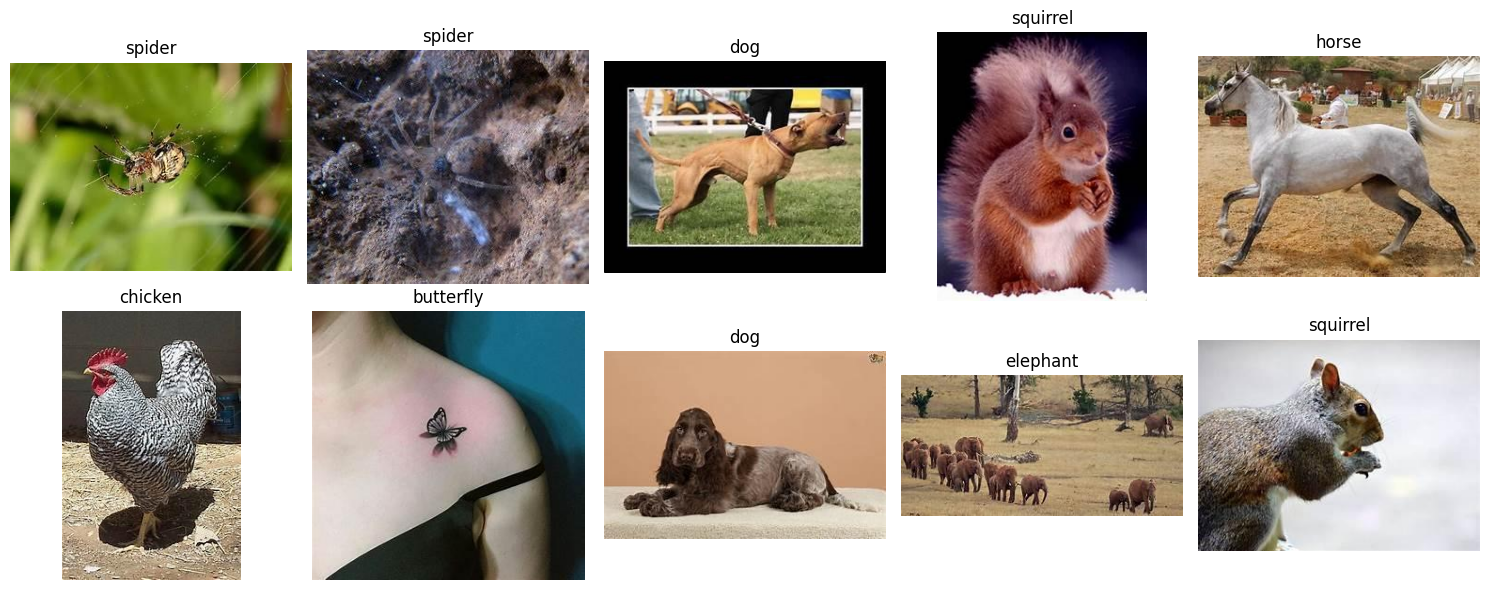

Images size statistics:
Mean width:  320.04
Mean height: 252.63
Min width:   60,  Max width:   6720
Min height:  57, Max height:  6000


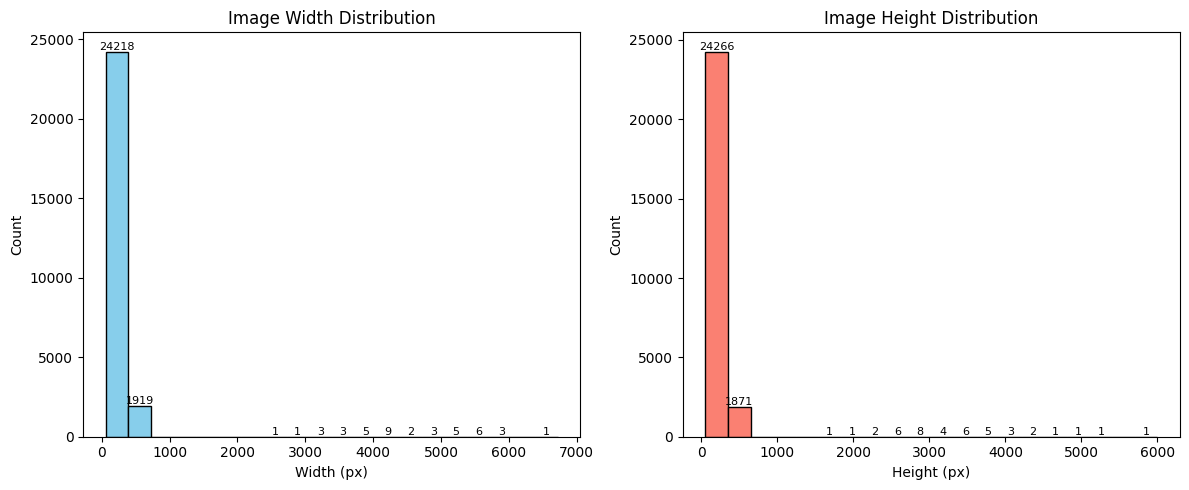

Smallest Image:
Size: 60x57
Path: c:\Users\adamg\Desktop\Ulohy\3 vyska\ZNEUS\cvika\zadania\zadanie 2\archive/raw-img\horse\OIP-4UmK-NKWl1fwEK9GfBSGKAAAAA.jpeg

Largest Image:
Size: 6720x4480
Path: c:\Users\adamg\Desktop\Ulohy\3 vyska\ZNEUS\cvika\zadania\zadanie 2\archive/raw-img\cat\max-boettinger-486490-unsplash.jpg


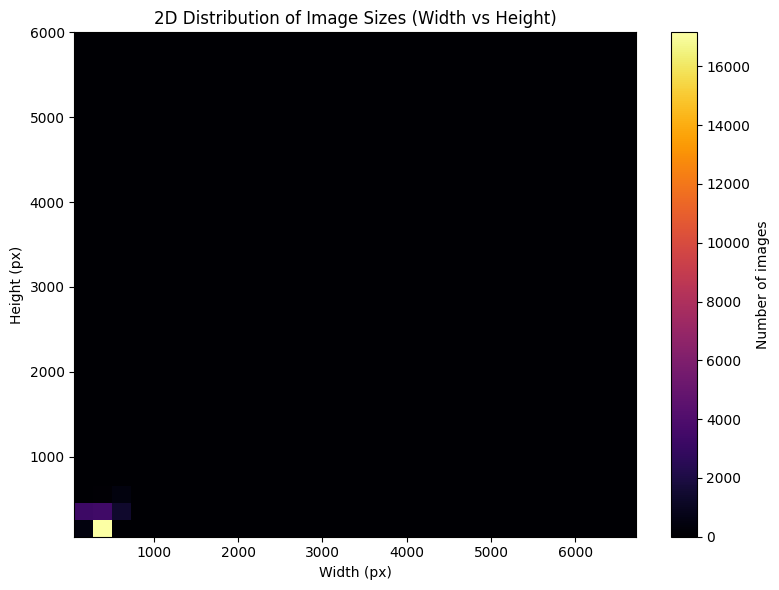

In [6]:
# data anylisis here >
# loading dataset for data vizualization and analysis
rename_dirs(dataset_dir)

analysis_dataset = ImageFolder(root=dataset_dir, transform=analysis_transform)
analysis_loader = DataLoader(dataset=analysis_dataset, shuffle=True, batch_size=10)

print("Classes:", analysis_dataset.classes)
print("Classes Count:", len(analysis_dataset.classes))

counts = Counter([label for _, label in analysis_dataset.samples])

print("\nImages per class:")
for idx, cls_name in enumerate(analysis_dataset.classes):
    print(f"{cls_name}: {counts[idx]}")

plt.figure(figsize=(10, 5))
values = [counts[i] for i in range(len(analysis_dataset.classes))]
bars = plt.bar(analysis_dataset.classes, values)
plt.xticks(rotation=45)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution")

for bar, value in zip(bars, values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        value,
        str(int(value)),
        ha="center",
        va="bottom",
        fontsize=8,
    )

plt.tight_layout()
plt.show()

show_sample_images(analysis_dataset, num_images=10)


paths = [path for (path, _) in analysis_dataset.samples]

widths = []
heights = []

for p in paths:
    with Image.open(p) as img:
        w, h = img.size
        widths.append(w)
        heights.append(h)

widths = np.array(widths)
heights = np.array(heights)

print("Images size statistics:")
print(f"Mean width:  {widths.mean():.2f}")
print(f"Mean height: {heights.mean():.2f}")
print(f"Min width:   {widths.min()},  Max width:   {widths.max()}")
print(f"Min height:  {heights.min()}, Max height:  {heights.max()}")

plt.figure(figsize=(12, 5))

# Width distribution histogram
plt.subplot(1, 2, 1)
counts_w, bins_w, patches_w = plt.hist(
    widths, bins=20, color="skyblue", edgecolor="black"
)
plt.title("Image Width Distribution")
plt.xlabel("Width (px)")
plt.ylabel("Count")

# Titles above bars
for count, patch in zip(counts_w, patches_w):
    if count > 0:
        plt.text(
            patch.get_x() + patch.get_width() / 2,
            count,
            str(int(count)),
            ha="center",
            va="bottom",
            fontsize=8,
        )

# Height distribution histogram
plt.subplot(1, 2, 2)
counts_h, bins_h, patches_h = plt.hist(
    heights, bins=20, color="salmon", edgecolor="black"
)
plt.title("Image Height Distribution")
plt.xlabel("Height (px)")
plt.ylabel("Count")

for count, patch in zip(counts_h, patches_h):
    if count > 0:
        plt.text(
            patch.get_x() + patch.get_width() / 2,
            count,
            str(int(count)),
            ha="center",
            va="bottom",
            fontsize=8,
        )

plt.tight_layout()
plt.show()


sizes = []

for path, _ in analysis_dataset.samples:
    with Image.open(path) as img:
        w, h = img.size
        sizes.append((w, h, path))


min_size = min(sizes, key=lambda x: x[0] * x[1])
max_size = max(sizes, key=lambda x: x[0] * x[1])

print("Smallest Image:")
print(f"Size: {min_size[0]}x{min_size[1]}")
print(f"Path: {min_size[2]}")
print()

print("Largest Image:")
print(f"Size: {max_size[0]}x{max_size[1]}")
print(f"Path: {max_size[2]}")

plt.figure(figsize=(8, 6))

plt.hist2d(widths, heights, bins=30, cmap="inferno")
plt.colorbar(label="Number of images")

plt.title("2D Distribution of Image Sizes (Width vs Height)")
plt.xlabel("Width (px)")
plt.ylabel("Height (px)")

plt.tight_layout()
plt.show()

In [7]:
# Split dataset into train, val, test folders
random.seed(42)

raw_dir = dataset_dir
base_dir = os.path.dirname(raw_dir)

train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

for d in [train_dir, val_dir, test_dir]:
    os.makedirs(d, exist_ok=True)

train_ratio = 0.70
val_ratio = 0.10
test_ratio = 0.20

valid_ext = (".jpg", ".jpeg", ".png", ".bmp")

for cls_name in os.listdir(raw_dir):
    cls_path = os.path.join(raw_dir, cls_name)
    if not os.path.isdir(cls_path):
        continue

    files = [f for f in os.listdir(cls_path) if f.lower().endswith(valid_ext)]

    if not files:
        continue

    random.shuffle(files)

    n = len(files)
    n_train = int(n * train_ratio)
    n_val = int(n * val_ratio)
    n_test = n - n_train - n_val

    train_files = files[:n_train]
    val_files = files[n_train : n_train + n_val]
    test_files = files[n_train + n_val :]

    train_cls_dir = os.path.join(train_dir, cls_name)
    val_cls_dir = os.path.join(val_dir, cls_name)
    test_cls_dir = os.path.join(test_dir, cls_name)

    os.makedirs(train_cls_dir, exist_ok=True)
    os.makedirs(val_cls_dir, exist_ok=True)
    os.makedirs(test_cls_dir, exist_ok=True)

    for fname in train_files:
        shutil.copy2(os.path.join(cls_path, fname), os.path.join(train_cls_dir, fname))

    for fname in val_files:
        shutil.copy2(os.path.join(cls_path, fname), os.path.join(val_cls_dir, fname))

    for fname in test_files:
        shutil.copy2(os.path.join(cls_path, fname), os.path.join(test_cls_dir, fname))

    print(f"{cls_name}: {n_train} train | {n_val} val | {n_test} test")

print("\nNew split complete:")
print("Train:", train_dir)
print("Val:  ", val_dir)
print("Test: ", test_dir)

butterfly: 1478 train | 211 val | 423 test
cat: 1167 train | 166 val | 335 test
chicken: 2168 train | 309 val | 621 test
cow: 1306 train | 186 val | 374 test
dog: 3404 train | 486 val | 973 test
elephant: 1012 train | 144 val | 290 test
horse: 1836 train | 262 val | 525 test
sheep: 1274 train | 182 val | 364 test
spider: 3374 train | 482 val | 965 test
squirrel: 1303 train | 186 val | 373 test

New split complete:
Train: c:\Users\adamg\Desktop\Ulohy\3 vyska\ZNEUS\cvika\zadania\zadanie 2\archive\train
Val:   c:\Users\adamg\Desktop\Ulohy\3 vyska\ZNEUS\cvika\zadania\zadanie 2\archive\val
Test:  c:\Users\adamg\Desktop\Ulohy\3 vyska\ZNEUS\cvika\zadania\zadanie 2\archive\test


In [8]:

train_path = os.path.join(base_dir, "train")
val_path = os.path.join(base_dir, "val")
test_path = os.path.join(base_dir, "test")

preprocess_basic = transforms.Compose(
    [transforms.Resize((224, 224)), transforms.ToTensor()]
)

train_raw = ImageFolder(train_path, transform=preprocess_basic)

train_raw_loader = DataLoader(dataset=train_raw, batch_size=64, shuffle=False)

pixel_sum = torch.zeros(3)
pixel_sq_sum = torch.zeros(3)
total_pixels = 0

for batch_images, _ in train_raw_loader:
    batch_size, channels, height, width = batch_images.shape
    num_pixels = batch_size * height * width
    total_pixels += num_pixels

    pixel_sum += batch_images.sum(dim=[0, 2, 3])
    pixel_sq_sum += (batch_images**2).sum(dim=[0, 2, 3])

mean = pixel_sum / total_pixels
std = torch.sqrt(pixel_sq_sum / total_pixels - mean**2)

print("Train Normalization Stats:")
print("Mean:", mean.tolist())
print("Std: ", std.tolist())

train_transforms = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize(mean, std),
    ]
)

val_transforms = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std),
    ]
)

test_transforms = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std),
    ]
)

train_set = ImageFolder(train_path, transform=train_transforms)
val_set = ImageFolder(val_path, transform=val_transforms)
test_set = ImageFolder(test_path, transform=test_transforms)


train_loader = DataLoader(train_set, batch_size=10, shuffle=True)
val_loader = DataLoader(val_set, batch_size=10, shuffle=False)
test_loader = DataLoader(test_set, batch_size=10, shuffle=False)

print("\nData Preparation finished!")
print("Train samples:", len(train_set))
print("Val samples:  ", len(val_set))
print("Test samples: ", len(test_set))

Train Normalization Stats:
Mean: [0.5180419087409973, 0.5006216764450073, 0.4129711985588074]
Std:  [0.2652018070220947, 0.26051950454711914, 0.27762001752853394]

Data Preparation finished!
Train samples: 18322
Val samples:   2614
Test samples:  5243


In [ ]:
#Convolutional Model   
#Using pytorch convolutional layers https://docs.pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d
#MaxPooling is used in the presentation in the VGG Net, lets use it as well https://docs.pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

#since we have multiclass classification, we will use softmax at the output  https://docs.pytorch.org/docs/stable/generated/torch.nn.Softmax.html 
class AnimalMLP(torch.nn.Module):
    def __init__(self, hidden_layers, kernel_size, stride, device):
        super().__init__()
        self.kernel_size = kernel_size
        self.stride = stride
        self.layers = torch.nn.ModuleList()
        self.prev = 3
        self.padding = 1
        self.device = device
        
        for out_channels in hidden_layers[0]:
            #adding flat padding = 1
            self.layers.append(torch.nn.Conv2d(self.prev, out_channels, self.kernel_size, self.stride, self.padding))
            self.layers.append(torch.nn.ReLU())
            self.layers.append(torch.nn.Conv2d(out_channels, out_channels, self.kernel_size, self.stride, self.padding))
            self.layers.append(torch.nn.ReLU())
            self.layers.append(torch.nn.MaxPool2d(2))
            
            self.prev = out_channels
            
        for out_channels in hidden_layers[1]:
            self.layers.append(torch.nn.Conv2d(self.prev, out_channels, self.kernel_size, self.stride, self.padding))
            self.layers.append(torch.nn.ReLU())
            self.layers.append(torch.nn.Conv2d(out_channels, out_channels, self.kernel_size, self.stride, self.padding))
            self.layers.append(torch.nn.ReLU())
            self.layers.append(torch.nn.Conv2d(out_channels, out_channels, self.kernel_size, self.stride, self.padding))
            self.layers.append(torch.nn.ReLU())
            self.layers.append(torch.nn.MaxPool2d(2))
            self.prev = out_channels

    def forward(self, input):
        for layer in self.layers:
            input = layer(input)
        return input
    
    #since output of our convolution is: torch.Size([10, 512, 7, 7]) 
    #input for our FCL will be 512*7*7 = 25088
    #pridat 3 Fully Connected Layers a na koniec Sigmoid
    #this is the fully connected layer that will classify the input
    def FCL(self, input):
        pass

def train_model(model, data_loader):
    for image_tensor, labels in data_loader:
        #shape is [Batch_size, Channels, Height, Width]
        print(image_tensor.shape)
        image_tensor = image_tensor.to(device)
        labels = labels.to(device)
        output = model.forward(image_tensor)
        print("output:", output.shape)
        #and label (correct class of the image) for each image in tensor (images)
        # print(labels) 
        # break


def validate_model(model, data_loader):
    pass

In [15]:
min_number_of_epochs = 2
hidden_layers = [[64, 128],[256, 512, 512]] #this is kinda static, if this changes, output of convolution changes, so the expected input of FCL will change 
model = AnimalMLP(hidden_layers, 3, 1, device).to(device)
print(model.layers)
#Training
for epoch in range(min_number_of_epochs):
    #we want, every epoch to train our model on train dataset and right after check validation dataset
    train_model(model, train_loader)
    validate_model(model, val_loader)
    
    print(epoch)
    
    
#pozriet vystup z konvolucie a potom dat flatten a zistit shape a napchat do jednoduchej MLP

ModuleList(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU()
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU()
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU()
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU()
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU()
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (18): ReLU()
  (19): Conv2d(512, 512, ke

KeyboardInterrupt: 

In [11]:
#trained model, ready for testing:

#Testing